In [149]:
import pandas as pd
from tensorflow import keras
import numpy as np

from sklearn.model_selection import train_test_split


In [150]:
df = pd.read_csv('Data/Cleaned/NoFG_Prior_Present.csv')

In [151]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [153]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

In [154]:
# Want to make 3 models = Simple, Medium, Complex and show it overfits. 
e = 300
batch_s = 16

In [159]:
model_simple = keras.models.Sequential()
model_simple.add(keras.layers.Dense(6, activation = 'relu', kernel_initializer = 'glorot_normal'))
model_simple.add(keras.layers.Dense(12, activation = 'relu', kernel_initializer = 'glorot_normal'))
model_simple.add(keras.layers.Dense(1, activation = 'sigmoid'))
model_simple.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history_simple = model_simple.fit(x_train, y_train, epochs = e, batch_size = batch_s, validation_data = (x_test, y_test), verbose = 0)

In [160]:
model_medium = keras.models.Sequential()
model_medium.add(keras.layers.Dense(6, activation = 'relu', kernel_initializer = 'glorot_normal'))
model_medium.add(keras.layers.Dense(12, activation = 'relu', kernel_initializer = 'glorot_normal'))
model_medium.add(keras.layers.Dense(24, activation = 'relu', kernel_initializer = 'glorot_normal'))
model_medium.add(keras.layers.Dense(12, activation = 'relu', kernel_initializer = 'glorot_normal'))
model_medium.add(keras.layers.Dense(1, activation = 'sigmoid'))
model_medium.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history_medium = model_medium.fit(x_train, y_train, epochs = e, batch_size = batch_s, validation_data = (x_test, y_test), verbose = 0)

In [161]:
model_complex = keras.models.Sequential()
model_complex.add(keras.layers.Dense(6, activation = 'relu', kernel_initializer = 'glorot_normal'))
model_complex.add(keras.layers.Dense(12, activation = 'relu', kernel_initializer = 'glorot_normal'))
model_complex.add(keras.layers.Dense(32, activation = 'relu', kernel_initializer = 'glorot_normal'))
model_complex.add(keras.layers.Dense(64, activation = 'relu', kernel_initializer = 'glorot_normal'))
model_complex.add(keras.layers.Dense(32, activation = 'relu', kernel_initializer = 'glorot_normal'))
model_complex.add(keras.layers.Dense(12, activation = 'relu', kernel_initializer = 'glorot_normal'))
model_complex.add(keras.layers.Dense(1, activation = 'sigmoid'))
model_complex.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history_complex = model_complex.fit(x_train, y_train, epochs = e, batch_size = batch_s, validation_data = (x_test, y_test), verbose = 0)

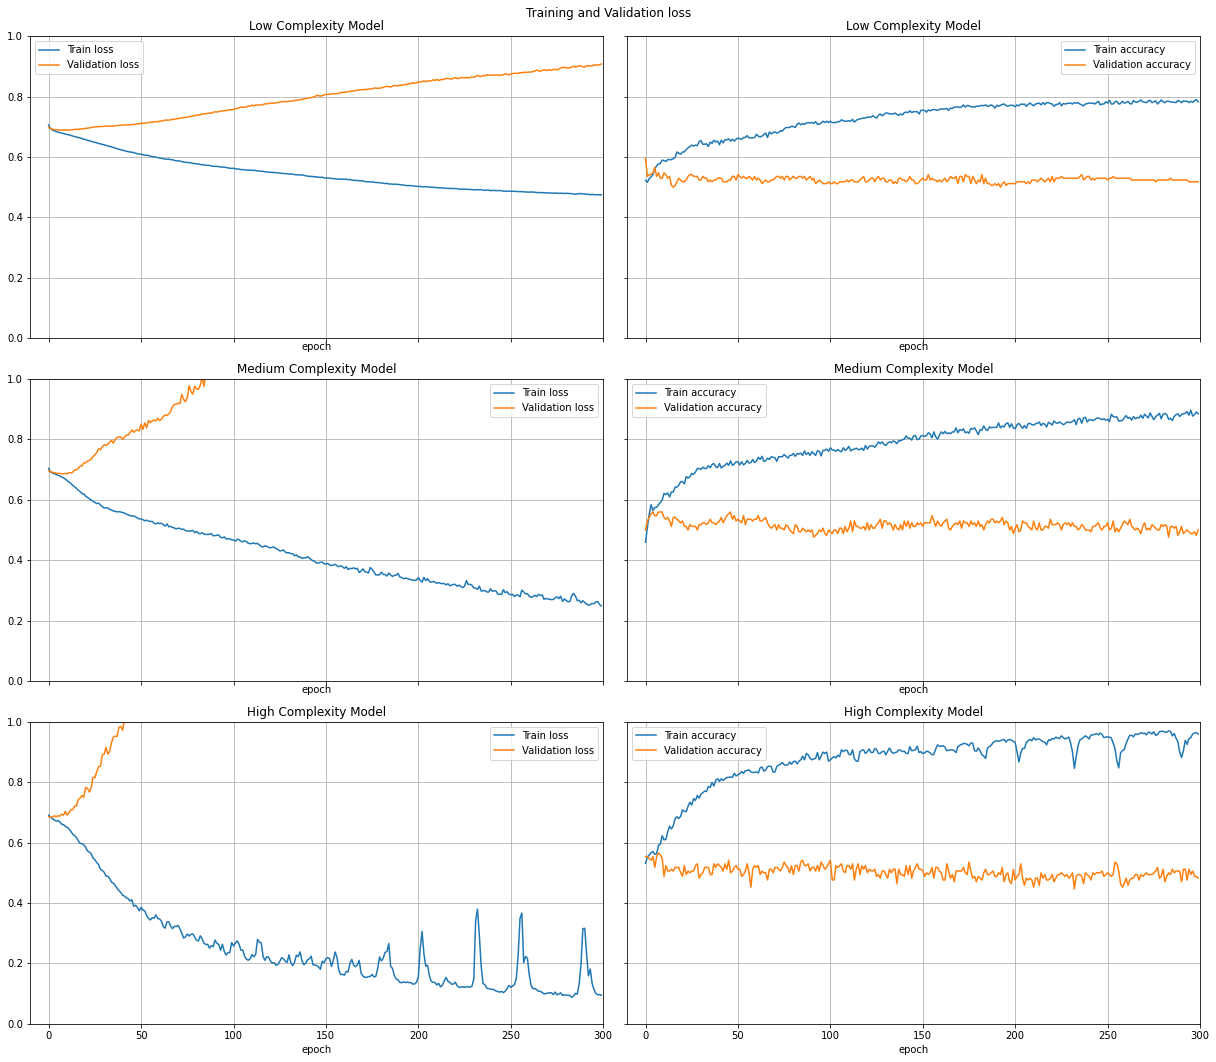

In [162]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 2, sharex=True, sharey=True)
fig.set_figheight(15)
fig.set_figwidth(17)

history = history_simple
fig.suptitle('Training and Validation loss')
axs[0, 0].set_title('Low Complexity Model')
axs[0, 0].plot(history.history['loss'], label='Train loss')
axs[0, 0].plot(history.history['val_loss'], label='Validation loss')
axs[0, 0].legend()
axs[0, 0].grid(True)
axs[0, 0].set_xlim([-10,e])
axs[0, 0].set_ylim([0,1.0])
axs[0, 0].set_xlabel('epoch')


axs[0, 1].set_title('Low Complexity Model')
axs[0, 1].plot(history.history['accuracy'], label='Train accuracy')
axs[0, 1].plot(history.history['val_accuracy'], label='Validation accuracy')
axs[0, 1].legend()
axs[0, 1].grid(True)
axs[0, 1].set_xlim([-10,e])
axs[0, 1].set_ylim([0,1.0])
axs[0, 1].set_xlabel('epoch')


history = history_medium

axs[1, 0].set_title('Medium Complexity Model')
axs[1, 0].plot(history.history['loss'], label='Train loss')
axs[1, 0].plot(history.history['val_loss'], label='Validation loss')
axs[1, 0].legend()
axs[1, 0].grid(True)
axs[1, 0].set_xlim([-10,e])
axs[1, 0].set_ylim([0,1.0])
axs[1, 0].set_xlabel('epoch')


axs[1, 1].set_title('Medium Complexity Model')
axs[1, 1].plot(history.history['accuracy'], label='Train accuracy')
axs[1, 1].plot(history.history['val_accuracy'], label='Validation accuracy')
axs[1, 1].legend()
axs[1, 1].grid(True)
axs[1, 1].set_xlim([-10,e])
axs[1, 1].set_ylim([0,1.0])
axs[1, 1].set_xlabel('epoch')


history = history_complex

axs[2, 0].set_title('High Complexity Model')
axs[2, 0].plot(history.history['loss'], label='Train loss')
axs[2, 0].plot(history.history['val_loss'], label='Validation loss')
axs[2, 0].legend()
axs[2, 0].grid(True)
axs[2, 0].set_xlim([-10,e])
axs[2, 0].set_ylim([0,1.0])
axs[2, 0].set_xlabel('epoch')


axs[2, 1].set_title('High Complexity Model')
axs[2, 1].plot(history.history['accuracy'], label='Train accuracy')
axs[2, 1].plot(history.history['val_accuracy'], label='Validation accuracy')
axs[2, 1].legend()
axs[2, 1].grid(True)
axs[2, 1].set_xlim([-10,e])
axs[2, 1].set_ylim([0,1.0])
axs[2, 1].set_xlabel('epoch')

plt.tight_layout()

plt.savefig('Plots_ModelOverfitting/ANN.png')


In [217]:
df = pd.read_csv('Data/Cleaned/NoFG_Prior_Present.csv')

In [218]:
def date(x):
    import datetime
    return datetime.datetime.strptime(x, '%Y-%m-%d')
def train_test_split2(df, train_split=0.8):
    # This splits the data into train and test splits
    obs = df.shape[0]
    train_split_point = int(train_split * obs)
    # Sort date columns to ensure its in order n then you can split
    df['prediction_day'] = df['prediction_day'].apply(date)
    df.sort_values(by='prediction_day', ascending=True)

    df['time_int'] = df['prediction_day'].apply(lambda x: x.value)

    # Split the data first and then do the rest
    train = df.iloc[:train_split_point]
    test = df.iloc[train_split_point:]

    return train.values, test.values

In [219]:
train, test = train_test_split2(df)


In [220]:
features_train = train[:, 1:-2]
features_test = test[:, 1:-2]

scaler = StandardScaler().fit(features_train)

features_train1 = scaler.transform(features_train)
features_test1 = scaler.transform(features_test)

train[:, 1:-2] = features_train1
test[:, 1:-2] = features_test1


In [221]:
def sequencer(df, seq_len=7):
    from collections import deque
    # This function is specifically for sequencing the data so it can be used with an RNN
    sequential_data = []
    prev_days = deque(maxlen=seq_len)

    for i in df:  # iterate over the values
        prev_days.append([n for n in i[1:-2]])
        if len(prev_days) == seq_len:
            sequential_data.append([np.array(prev_days), i[-2]])
    X = []
    y = []
    for seq, target in sequential_data:
        X.append(seq)
        y.append(target)
    return np.array(X), np.array(y)

In [222]:
x_train, y_train = sequencer(train)
x_test, y_test = sequencer(test)

In [223]:
model_simple = keras.models.Sequential()
model_simple.add(keras.layers.LSTM(6, activation = 'relu', kernel_initializer = 'glorot_normal'))
model_simple.add(keras.layers.Dense(1, activation = 'sigmoid', kernel_initializer = 'glorot_normal'))
model_simple.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history_simple = model_simple.fit(x_train, y_train, epochs = e, batch_size = batch_s, validation_data = (x_test, y_test), verbose = 0)

In [224]:
model_medium = keras.models.Sequential()
model_medium.add(keras.layers.LSTM(6, activation = 'relu', kernel_initializer = 'glorot_normal', return_sequences = True))
model_medium.add(keras.layers.LSTM(12, activation = 'relu', kernel_initializer = 'glorot_normal'))
model_medium.add(keras.layers.Dense(12, activation = 'sigmoid', kernel_initializer = 'glorot_normal'))
model_medium.add(keras.layers.Dense(1, activation = 'sigmoid', kernel_initializer = 'glorot_normal'))
model_medium.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history_medium = model_medium.fit(x_train, y_train, epochs = e, batch_size = batch_s, validation_data = (x_test, y_test), verbose = 0)

In [225]:
model_complex = keras.models.Sequential()
model_complex.add(keras.layers.LSTM(6, activation = 'relu', kernel_initializer = 'glorot_normal', return_sequences = True))
model_complex.add(keras.layers.LSTM(12, activation = 'relu', kernel_initializer = 'glorot_normal', return_sequences = True))
model_complex.add(keras.layers.LSTM(12, activation = 'relu', kernel_initializer = 'glorot_normal'))
model_complex.add(keras.layers.Dense(12, activation = 'sigmoid', kernel_initializer = 'glorot_normal'))
model_complex.add(keras.layers.Dense(24, activation = 'sigmoid', kernel_initializer = 'glorot_normal'))
model_complex.add(keras.layers.Dense(12, activation = 'sigmoid', kernel_initializer = 'glorot_normal'))
model_complex.add(keras.layers.Dense(1, activation = 'sigmoid'))
model_complex.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history_complex = model_complex.fit(x_train, y_train, epochs = e, batch_size = batch_s, validation_data = (x_test, y_test), verbose = 0)

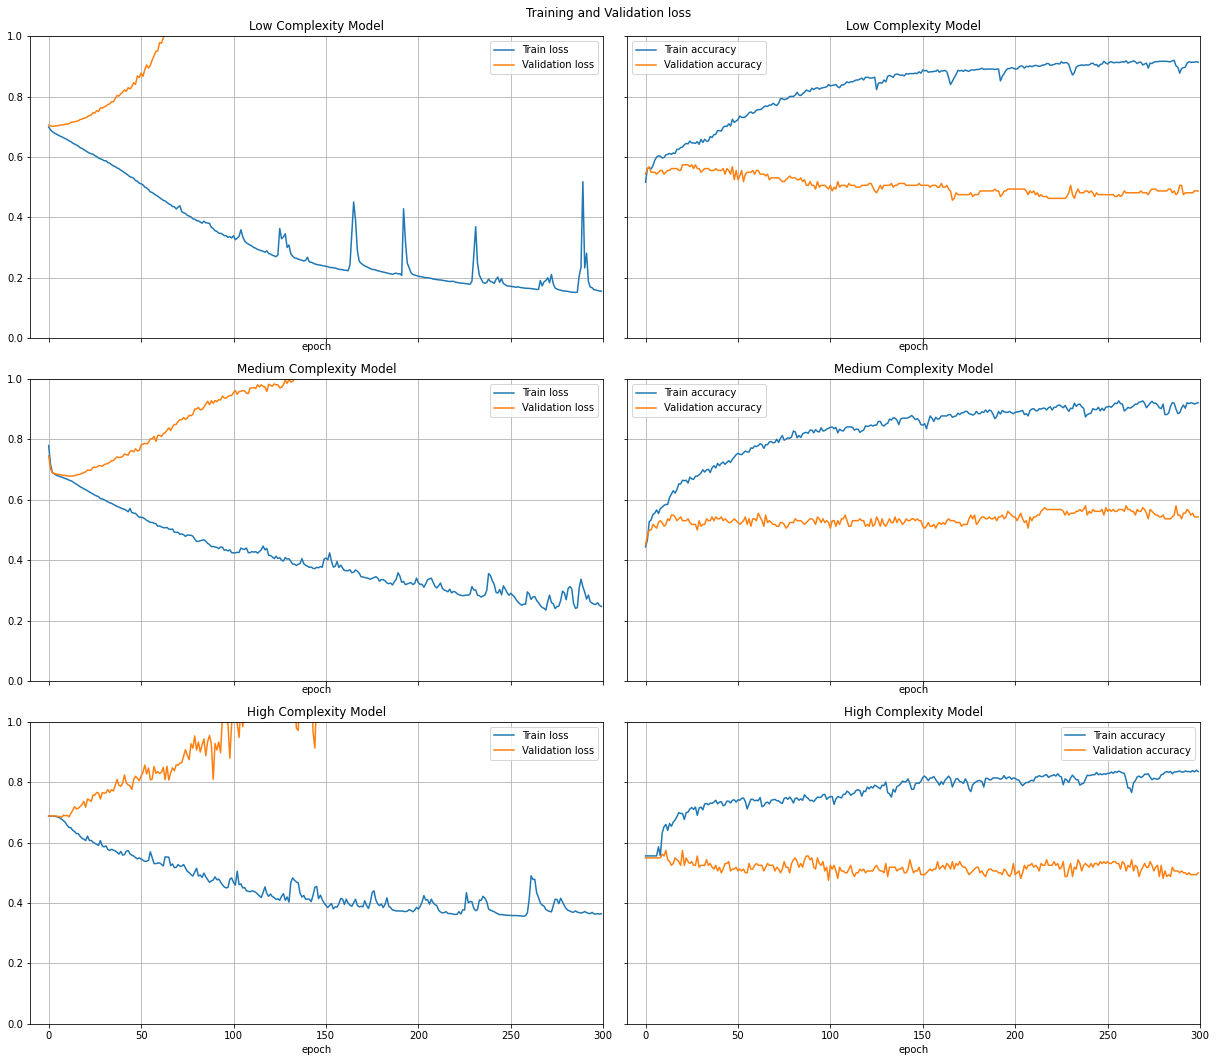

In [226]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 2, sharex=True, sharey=True)
fig.set_figheight(15)
fig.set_figwidth(17)

history = history_simple
fig.suptitle('Training and Validation loss')
axs[0, 0].set_title('Low Complexity Model')
axs[0, 0].plot(history.history['loss'], label='Train loss')
axs[0, 0].plot(history.history['val_loss'], label='Validation loss')
axs[0, 0].legend()
axs[0, 0].grid(True)
axs[0, 0].set_xlim([-10,e])
axs[0, 0].set_ylim([0,1.0])
axs[0, 0].set_xlabel('epoch')


axs[0, 1].set_title('Low Complexity Model')
axs[0, 1].plot(history.history['accuracy'], label='Train accuracy')
axs[0, 1].plot(history.history['val_accuracy'], label='Validation accuracy')
axs[0, 1].legend()
axs[0, 1].grid(True)
axs[0, 1].set_xlim([-10,e])
axs[0, 1].set_ylim([0,1.0])
axs[0, 1].set_xlabel('epoch')


history = history_medium

axs[1, 0].set_title('Medium Complexity Model')
axs[1, 0].plot(history.history['loss'], label='Train loss')
axs[1, 0].plot(history.history['val_loss'], label='Validation loss')
axs[1, 0].legend()
axs[1, 0].grid(True)
axs[1, 0].set_xlim([-10,e])
axs[1, 0].set_ylim([0,1.0])
axs[1, 0].set_xlabel('epoch')


axs[1, 1].set_title('Medium Complexity Model')
axs[1, 1].plot(history.history['accuracy'], label='Train accuracy')
axs[1, 1].plot(history.history['val_accuracy'], label='Validation accuracy')
axs[1, 1].legend()
axs[1, 1].grid(True)
axs[1, 1].set_xlim([-10,e])
axs[1, 1].set_ylim([0,1.0])
axs[1, 1].set_xlabel('epoch')


history = history_complex

axs[2, 0].set_title('High Complexity Model')
axs[2, 0].plot(history.history['loss'], label='Train loss')
axs[2, 0].plot(history.history['val_loss'], label='Validation loss')
axs[2, 0].legend()
axs[2, 0].grid(True)
axs[2, 0].set_xlim([-10,e])
axs[2, 0].set_ylim([0,1.0])
axs[2, 0].set_xlabel('epoch')


axs[2, 1].set_title('High Complexity Model')
axs[2, 1].plot(history.history['accuracy'], label='Train accuracy')
axs[2, 1].plot(history.history['val_accuracy'], label='Validation accuracy')
axs[2, 1].legend()
axs[2, 1].grid(True)
axs[2, 1].set_xlim([-10,e])
axs[2, 1].set_ylim([0,1.0])
axs[2, 1].set_xlabel('epoch')

plt.tight_layout()

plt.savefig('Plots_ModelOverfitting/LSTM.png')